In [ ]:

#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## DAY4 MACHINE LEARNING IN PYTHON ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs



In [1]:
#=================================================-
#### Slide 4: Loading packages  ####

# Helper packages.
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Scikit-learn package for logistic regression.
from sklearn import linear_model

# Model set up and tuning packages from scikit-learn.
from sklearn.model_selection import train_test_split

# Scikit-learn packages for evaluating model performance.
from sklearn import metrics

# Scikit-learn package for data preprocessing.
from sklearn import preprocessing



In [2]:
#=================================================-
#### Slide 5: Directory settings  ####

# Set `home_dir` to the root directory of your computer.
home_dir = Path.home()
# Set `main_dir` to the location of your `skillsoft-intro-to-machine-learning-in-python` folder.
main_dir = home_dir / "Desktop" / "skillsoft-intro-to-machine-learning-in-python"
# Make `data_dir` from the `main_dir` and
# remainder of the path to data directory.
data_dir = main_dir / "data"
# Create a plot directory to save our plots
plot_dir = main_dir / "plots"



In [3]:
#=================================================-
#### Slide 6: Working directory  ####

# Set working directory.
os.chdir(data_dir)
# Check working directory.
print(os.getcwd())



/Users/datasociety/Desktop/skillsoft-intro-to-machine-learning-in-python/data


In [4]:
#=================================================-
#### Slide 10: Load the dataset  ####

household_poverty = pd.read_csv("costa_rica_poverty.csv")
print(household_poverty.head())



  household_id        ind_id  rooms  tablet  males_under_12  males_over_12  \
0    21eb7fcc1  ID_279628684      3       0               0              1   
1    0e5d7a658  ID_f29eb3ddd      4       1               0              1   
2    2c7317ea8  ID_68de51c94      8       0               0              0   
3    2b58d945f  ID_d671db89c      5       1               0              2   
4    2b58d945f  ID_d56d6f5f5      5       1               0              2   

   males_tot  females_under_12  females_over_12  females_tot  ...  \
0          1                 0                0            0  ...   
1          1                 0                0            0  ...   
2          0                 0                1            1  ...   
3          2                 1                1            2  ...   
4          2                 1                1            2  ...   

   region_Chorotega  region_pacifico  region_brunca  region_antlantica  \
0                 0                0      

In [5]:
#=================================================-
#### Slide 12: Subsetting data  ####

household_logistic = household_poverty.drop(['household_id', 'ind_id', 'monthly_rent'], axis = 1)



In [6]:
#=================================================-
#### Slide 13: The data at first glance  ####

# The data types.
print(household_logistic.dtypes.head())
print(household_logistic['Target'].value_counts())



rooms             int64
tablet            int64
males_under_12    int64
males_over_12     int64
males_tot         int64
dtype: object
4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64


In [7]:
#=================================================-
#### Slide 14: Converting the target variable  ####

household_logistic['Target'] = np.where(household_logistic['Target'] <= 3, 'vulnerable', 'non_vulnerable')
print(household_logistic['Target'].head())



0    non_vulnerable
1    non_vulnerable
2    non_vulnerable
3    non_vulnerable
4    non_vulnerable
Name: Target, dtype: object


In [8]:
#=================================================-
#### Slide 15: Data prep: check for NAs  ####

# Check for NAs.
print(household_logistic.isnull().sum().head())



rooms             0
tablet            0
males_under_12    0
males_over_12     0
males_tot         0
dtype: int64


In [9]:
#=================================================-
#### Slide 16: Data prep: numeric variables  ####

print(household_logistic.dtypes.head())



rooms             int64
tablet            int64
males_under_12    int64
males_over_12     int64
males_tot         int64
dtype: object


In [10]:
#=================================================-
#### Slide 17: Data prep: target  ####

print(household_logistic.Target.dtypes)
household_logistic["Target"] = np.where(household_logistic["Target"] == "non_vulnerable", True, False)

# Check class again.
print(household_logistic.Target.dtypes)



object
bool


In [11]:
#=================================================-
#### Slide 18: Split into train and test set  ####

# Separate predictors from data.
X = household_logistic[['rooms', 'num_adults']]

# Separate target from data.
y = np.array(household_logistic['Target'])
# Set the seed.
np.random.seed(1)

# Split data into training and test sets, use a 70 train - 30 test split.
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size = .3)




In [12]:
#=================================================-
#### Slide 21: Logistic regression: build  ####

# Set up logistic regression model.
logistic_regression_model = linear_model.LogisticRegression()
print(logistic_regression_model)



LogisticRegression()


In [13]:
#=================================================-
#### Slide 23: Logistic regression: fit  ####

# Fit the model.
logistic_regression_model.fit(X_train,
y_train)



LogisticRegression()

In [14]:
#=================================================-
#### Slide 25: Logistic regression: predict  ####

# Predict on test data.
predicted_values = logistic_regression_model.predict(X_test)
print(predicted_values)



[ True  True  True ...  True False  True]


In [15]:
#=================================================-
#### Slide 27: Exercise 1  ####





In [16]:
#=================================================-
#### Slide 34: Confusion matrix and accuracy  ####

# Take a look at test data confusion matrix.
conf_matrix_test = metrics.confusion_matrix(y_test, predicted_values)
print(conf_matrix_test)
# Compute test model accuracy score.
test_accuracy_score = metrics.accuracy_score(y_test, predicted_values)
print("Accuracy on test data: ", test_accuracy_score)



[[ 178  884]
 [ 161 1645]]
Accuracy on test data:  0.6356345885634589


In [17]:
#=================================================-
#### Slide 35: Classification report  ####

# Create a list of target names to interpret class assignments.
target_names = ['vulnerable', 'non_vulnerable']
# Print an entire classification report.
class_report = metrics.classification_report(y_test,
predicted_values,
target_names = target_names)
print(class_report)



                precision    recall  f1-score   support

    vulnerable       0.53      0.17      0.25      1062
non_vulnerable       0.65      0.91      0.76      1806

      accuracy                           0.64      2868
     macro avg       0.59      0.54      0.51      2868
  weighted avg       0.60      0.64      0.57      2868



In [18]:
#=================================================-
#### Slide 39: Add accuracy score to the final scores  ####

model_final = pickle.load(open("model_final.sav","rb"))
model_final = model_final.append({'metrics' : "accuracy" ,
'values' : round(test_accuracy_score,4),
'model':'logistic' } ,
ignore_index = True)
print(model_final)



    metrics  values             model
0  accuracy  0.6046             knn_5
1  accuracy  0.6268  knn_GridSearchCV
2  accuracy  0.6287            knn_29
3  accuracy  0.6268  knn_GridSearchCV
4  accuracy  0.6287            knn_29
5  accuracy  0.6356          logistic


In [19]:
#=================================================-
#### Slide 40: Getting probabilities instead of class labels  ####

# Get probabilities instead of predicted values.
test_probabilities = logistic_regression_model.predict_proba(X_test)
print(test_probabilities[0:5, :])
# Get probabilities of test predictions only.
test_predictions = test_probabilities[:, 1]
print(test_predictions[0:5])



[[0.28454513 0.71545487]
 [0.37631548 0.62368452]
 [0.16166044 0.83833956]
 [0.5294136  0.4705864 ]
 [0.3519399  0.6480601 ]]
[0.71545487 0.62368452 0.83833956 0.4705864  0.6480601 ]


In [20]:
#=================================================-
#### Slide 41: Computing FPR, TPR, and threshold  ####

# Get FPR, TPR, and threshold values.
fpr, tpr, threshold = metrics.roc_curve(y_test,            #<- test data labels
test_predictions)  #<- predicted probabilities
print("False positive: ", fpr[:5])
print("True positive: ", tpr[:5])
print("Threshold: ", threshold[:5])



False positive:  [0.        0.        0.        0.        0.0047081]
True positive:  [0.         0.00387597 0.00609081 0.01052049 0.01162791]
Threshold:  [1.93016754 0.93016754 0.91552704 0.90664549 0.89774864]


In [21]:
#=================================================-
#### Slide 42: Computing AUC  ####

# Get AUC by providing the FPR and TPR.
auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve: ", auc)



Area under the ROC curve:  0.6440758780628705


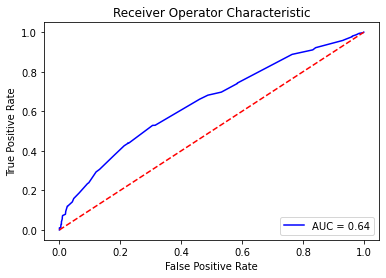

In [22]:
#=================================================-
#### Slide 43: Putting it all together: ROC plot  ####

# Make an ROC curve plot.
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()




In [23]:
#=================================================-
#### Slide 45: Exercise 2  ####





In [24]:
#=================================================-
#### Slide 47: Working with categorical variables  ####

print(household_logistic.age.head())
household_logistic['age'] = np.where(household_logistic['age'] <= 30, "30 or Below",
np.where(household_logistic['age'] < 60, 'Between 30 and 60', '60 and above'))




0    43
1    67
2    92
3    17
4    37
Name: age, dtype: int64


In [25]:
#=================================================-
#### Slide 48: Working with categorical variables  ####

household_logistic.age.value_counts()



30 or Below          4655
Between 30 and 60    3495
60 and above         1407
Name: age, dtype: int64

In [26]:
#=================================================-
#### Slide 52: Transform `age` into dummies  ####

# Convert 'age' into dummy variables.
age_dummy = pd.get_dummies(household_logistic['age'], drop_first = True)
print(age_dummy.head())



   60 and above  Between 30 and 60
0             0                  1
1             1                  0
2             1                  0
3             0                  0
4             0                  1


In [27]:
#=================================================-
#### Slide 53: Transform `age` into dummies  ####

# Drop `age` from the data.
household_logistic.drop(['age'], axis = 1, inplace = True)
# Concatenate `age_dummy` to our dataset.
household_logistic = pd.concat([household_logistic,age_dummy],axis=1)
print(household_logistic.head())



   rooms  tablet  males_under_12  males_over_12  males_tot  females_under_12  \
0      3       0               0              1          1                 0   
1      4       1               0              1          1                 0   
2      8       0               0              0          0                 0   
3      5       1               0              2          2                 1   
4      5       1               0              2          2                 1   

   females_over_12  females_tot  ppl_under_12  ppl_over_12  ...  \
0                0            0             0            1  ...   
1                0            0             0            1  ...   
2                1            1             0            1  ...   
3                1            2             1            3  ...   
4                1            2             1            3  ...   

   region_Chorotega  region_pacifico  region_brunca  region_antlantica  \
0                 0                0      

In [28]:
#=================================================-
#### Slide 55: Split into train and test set  ####

# Separate predictors from data.
# We can just drop the target variable, as we are using all other variables as predictors.
X = household_logistic.drop('Target', axis = 1)


# Separate target from data.
y = np.array(household_logistic['Target'])
# Set the seed.
np.random.seed(1)
# Split data into training and test sets, use a 70 train - 30 test split.
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size = .3)




In [29]:
#=================================================-
#### Slide 56: Logistic regression: build  ####

# Set up the logistic regression model.
logistic_regression_model = linear_model.LogisticRegression(solver='liblinear')
print(logistic_regression_model)



LogisticRegression(solver='liblinear')


In [30]:
#=================================================-
#### Slide 57: Logistic regression: fit  ####

# Fit the model.
logistic_regression_model.fit(X_train,
y_train)



LogisticRegression(solver='liblinear')

In [31]:
#=================================================-
#### Slide 58: Logistic regression: predict  ####

# Predict on test data.
predicted_values = logistic_regression_model.predict(X_test)
print(predicted_values)



[ True False  True ...  True False False]


In [32]:
#=================================================-
#### Slide 59: Confusion matrix and accuracy  ####

# Take a look at test data confusion matrix.
conf_matrix_test = metrics.confusion_matrix(y_test, predicted_values)
print(conf_matrix_test)
# Compute test model accuracy score.
test_accuracy_score = metrics.accuracy_score(y_test, predicted_values)
print("Accuracy on test data: ", test_accuracy_score)



[[ 687  375]
 [ 244 1562]]
Accuracy on test data:  0.7841701534170153


In [33]:
#=================================================-
#### Slide 60: Add accuracy score to the final scores  ####

model_final = model_final.append({'metrics' : "accuracy" ,
'values' : round(test_accuracy_score,4),
'model':'logistic_whole_dataset'} ,
ignore_index = True)
print(model_final)



    metrics  values                   model
0  accuracy  0.6046                   knn_5
1  accuracy  0.6268        knn_GridSearchCV
2  accuracy  0.6287                  knn_29
3  accuracy  0.6268        knn_GridSearchCV
4  accuracy  0.6287                  knn_29
5  accuracy  0.6356                logistic
6  accuracy  0.7842  logistic_whole_dataset


In [34]:
#=================================================-
#### Slide 61: Accuracy on train vs accuracy on test  ####

# Compute trained model accuracy score.
trained_accuracy_score = logistic_regression_model.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)



Accuracy on train data:  0.7808342054118702


In [ ]:
#=================================================-
#### Slide 63: Exercise 3  ####



